# Regression on matched data

In [13]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%config InlineBackend.figure_format='retina'

matched on: columns that are correlated with `anxiety`(‘risk_of_depression’,‘lone_isolated’,‘dx_any’,‘persist’ ,‘sui_idea’,‘meds_any’,‘abuse_life’,‘sexual_h’,‘finpast’,‘satisfied_overall’,‘fincur’,‘positive_mental_health’) and `online`(‘degree_ass’, ‘hours_work_paid’, ‘age’, ‘enroll’, ‘degree_bach’), and the final iteration of matching droped (‘sui_idea’, ‘sexual_h’, ‘degree_ass’, ‘abuse_life’), meaning we only used----> **‘risk_of_depression’,‘lone_isolated’,‘dx_any’,‘persist’ ,‘meds_any’,‘finpast’,‘satisfied_overall’,‘fincur’,‘positive_mental_health’,‘hours_work_paid’, ‘age’, ‘enroll’, ‘degree_bach’**

In [2]:
# load data
matched_data = pd.read_csv("https://raw.githubusercontent.com/MIDS-at-Duke/uds-2023-team-1/main"+
                           "/30_intermediate_files/matched_data_new.csv?token=GHSAT0AAAAAAB5IWVS4MDD5TUUQFIK5MX6QZB5Z5OA")

In [3]:
matched_data.head()

,Unnamed: 0,startdate,recordeddate,responseid,age,sex_birth,gender_male,gender_female,gender_transm,gender_transf,...,weights,match_group_size,match_group,week-year,state,new_case,state_new,2020,cases_per_cap,cases_per_10k
0,0,2022-04-22 09:54:31,2022-04-22 13:49:38,R_32J8GAWh6IOIYxm,20.0,2.0,1.0,0.0,0.0,0.0,...,1.000000,2.0,11748.0,16-2022,CA,37047,California,39501653,0.000938,9.378595
1,1,2022-04-11 12:35:38,2022-04-11 12:59:31,R_72I28iy8iqGtOnL,27.0,2.0,1.0,0.0,0.0,0.0,...,0.394260,4.0,7143.0,15-2022,CA,25540,California,39501653,0.000647,6.465552
2,2,2022-04-15 13:40:00,2022-04-15 16:36:31,R_1qdE55ZSFYCZrfT,22.0,1.0,0.0,1.0,0.0,0.0,...,1.000000,2.0,13890.0,15-2022,CA,25540,California,39501653,0.000647,6.465552
3,3,2022-04-12 18:50:55,2022-04-12 19:10:41,R_WjGvkFnenaDKdwd,19.0,1.0,0.0,1.0,0.0,0.0,...,1.182779,2.0,5052.0,15-2022,CA,25540,California,39501653,0.000647,6.465552
4,4,2022-04-15 18:21:14,2022-04-15 18:52:05,R_2ciNNqFgeQYt2pR,19.0,2.0,1.0,0.0,0.0,0.0,...,1.182779,2.0,16008.0,15-2022,CA,25540,California,39501653,0.000647,6.465552


In [4]:
matched_data.shape

(40054, 91)

In [5]:
matched_data.columns

Index(['Unnamed: 0', 'startdate', 'recordeddate', 'responseid', 'age',
       'sex_birth', 'gender_male', 'gender_female', 'gender_transm',
       'gender_transf', 'sexual_other', 'gender_nonbin', 'gender_selfid',
       'sexual_h', 'sexual_l', 'sexual_g', 'sexual_bi', 'sexual_queer',
       'sexual_quest', 'sexual_asexual', 'sexual_pan', 'race_black',
       'race_ainaan', 'race_asian', 'race_his', 'race_pi', 'race_mides',
       'race_white', 'race_other', 'international', 'educ_par1', 'educ_par2',
       'scholarship_status_1', 'children_dep', 'hours_work_paid', 'transfer',
       'yr_sch', 'enroll', 'persist', 'disab_1', 'disab_2',
       'positive_mental_health', 'risk_of_depression', 'anxiety', 'timestud',
       'sui_idea', 'lone_isolated', 'abuse_life', 'assault_emo', 'alc_any',
       'sub_cig', 'sub_any', 'exerc', 'sleep_wknight', 'dx_any', 'knowwher',
       'meds_any', 'degree_ass', 'degree_bach', 'degree_ma', 'degree_jd',
       'degree_md', 'degree_phd', 'degree_other', '

In [7]:
# put all the columns into a list
cols = matched_data.columns.tolist()
cols = cols[4:]
cols

['age',
 'sex_birth',
 'gender_male',
 'gender_female',
 'gender_transm',
 'gender_transf',
 'sexual_other',
 'gender_nonbin',
 'gender_selfid',
 'sexual_h',
 'sexual_l',
 'sexual_g',
 'sexual_bi',
 'sexual_queer',
 'sexual_quest',
 'sexual_asexual',
 'sexual_pan',
 'race_black',
 'race_ainaan',
 'race_asian',
 'race_his',
 'race_pi',
 'race_mides',
 'race_white',
 'race_other',
 'international',
 'educ_par1',
 'educ_par2',
 'scholarship_status_1',
 'children_dep',
 'hours_work_paid',
 'transfer',
 'yr_sch',
 'enroll',
 'persist',
 'disab_1',
 'disab_2',
 'positive_mental_health',
 'risk_of_depression',
 'anxiety',
 'timestud',
 'sui_idea',
 'lone_isolated',
 'abuse_life',
 'assault_emo',
 'alc_any',
 'sub_cig',
 'sub_any',
 'exerc',
 'sleep_wknight',
 'dx_any',
 'knowwher',
 'meds_any',
 'degree_ass',
 'degree_bach',
 'degree_ma',
 'degree_jd',
 'degree_md',
 'degree_phd',
 'degree_other',
 'degree_nd',
 'gr_a',
 'gr_b',
 'gr_c',
 'gr_d',
 'gr_f',
 'gr_none',
 'gr_dk',
 'satisfied_ove

In [8]:
#put cols in to a string
cols_str = "+".join(cols)
cols_str

'age+sex_birth+gender_male+gender_female+gender_transm+gender_transf+sexual_other+gender_nonbin+gender_selfid+sexual_h+sexual_l+sexual_g+sexual_bi+sexual_queer+sexual_quest+sexual_asexual+sexual_pan+race_black+race_ainaan+race_asian+race_his+race_pi+race_mides+race_white+race_other+international+educ_par1+educ_par2+scholarship_status_1+children_dep+hours_work_paid+transfer+yr_sch+enroll+persist+disab_1+disab_2+positive_mental_health+risk_of_depression+anxiety+timestud+sui_idea+lone_isolated+abuse_life+assault_emo+alc_any+sub_cig+sub_any+exerc+sleep_wknight+dx_any+knowwher+meds_any+degree_ass+degree_bach+degree_ma+degree_jd+degree_md+degree_phd+degree_other+degree_nd+gr_a+gr_b+gr_c+gr_d+gr_f+gr_none+gr_dk+satisfied_overall+deport_worry+fincur+finpast+food_worry+food_notlast+inst_state+first_gen+is_online+weights+match_group_size+match_group+week-year+state+new_case+state_new+2020+cases_per_cap+cases_per_10k'

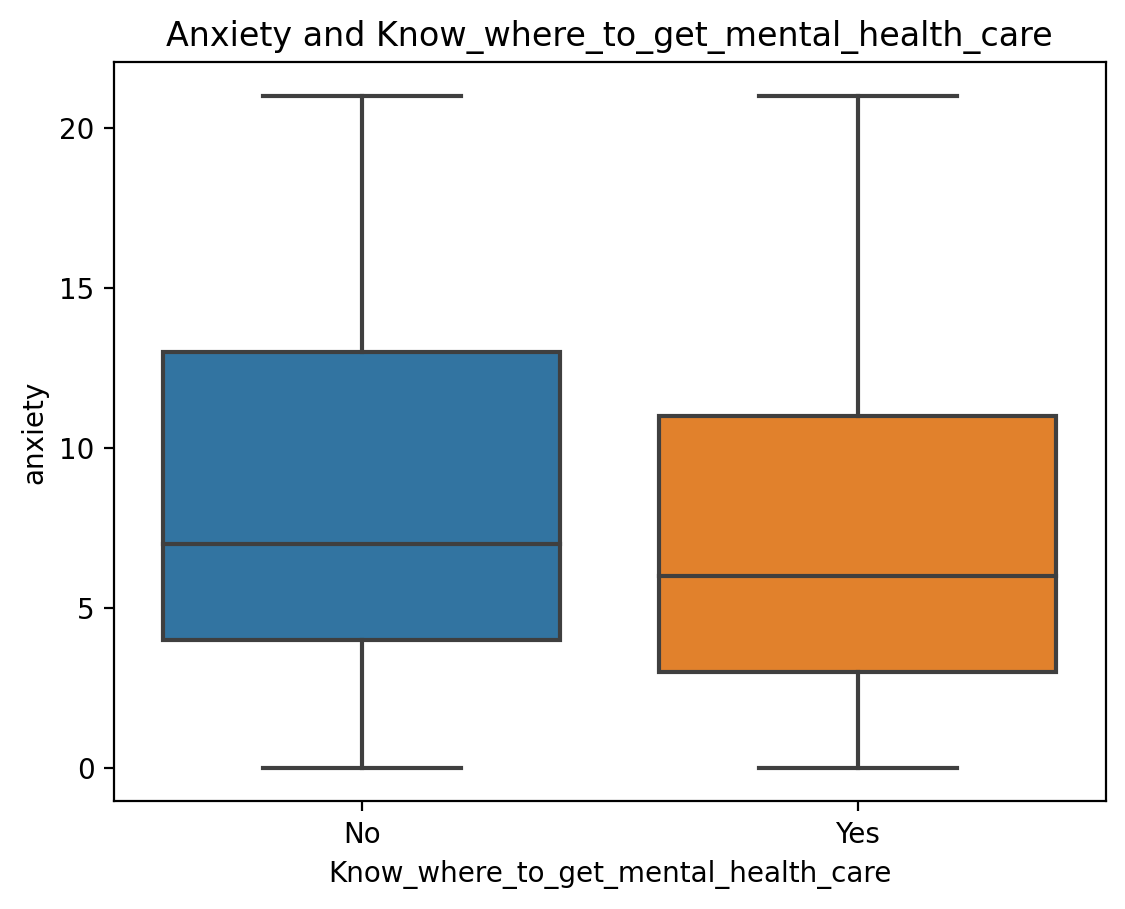

In [14]:
# anxiety and know where to get mental health care
sns.boxplot(x='knowwher', y="anxiety", data=matched_data)
plt.xlabel("Know_where_to_get_mental_health_care")
plt.xticks([0.0,1.0], ['No', 'Yes'])
plt.title("Anxiety and Know_where_to_get_mental_health_care")   
plt.show()

In [15]:
# t-test
stats.ttest_ind(matched_data[matched_data['knowwher']==0]['anxiety'], matched_data[matched_data['knowwher']==1]['anxiety'])
print('the p-value is close to:', 0.000000)

the p-value is close to: 0.0


In [12]:
# delete educ_par1 and educ_par2 since we made first_gen to represent both
# add interaction terms: C(is_online)*C(enroll), C(is_online)*C(knowwher)
smf.wls('anxiety ~ age+C(sex_birth)+gender_male+gender_female+gender_transm+gender_transf+sexual_other'+
        '+gender_nonbin+gender_selfid+sexual_h+sexual_l+sexual_g+sexual_bi+sexual_queer+sexual_quest+sexual_asexual'+
        '+sexual_pan+race_black+race_ainaan+race_asian+race_his+race_pi+race_mides+race_white+race_other'+
        '+C(international)+ C(scholarship_status_1)+C(children_dep)+hours_work_paid'+
        '+C(transfer)+C(yr_sch)+C(persist)+C(disab_1)+C(disab_2)+C(positive_mental_health)'+
        '+C(risk_of_depression)+C(timestud)+C(sui_idea)+C(lone_isolated)+C(abuse_life)+C(assault_emo)'+
        '+C(alc_any)+C(sub_cig)+C(sub_any)+C(exerc)+sleep_wknight+C(dx_any)+C(meds_any)'+
        '+degree_ass+degree_bach+degree_ma+degree_jd+degree_md+degree_phd+degree_other+degree_nd'+
        '+gr_a+gr_b+gr_c+gr_d+gr_f+gr_none+gr_dk+C(satisfied_overall)+C(deport_worry)+C(fincur)+C(finpast)'+
        '+C(food_worry)+C(food_notlast)+C(first_gen)+C(is_online)*C(enroll)+C(is_online)*C(knowwher)+cases_per_10k', 
        data=matched_data, weights = matched_data['weights']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                anxiety   R-squared:                       0.544
Model:                            WLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     386.8
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:13:47   Log-Likelihood:            -1.1251e+05
No. Observations:               40054   AIC:                         2.253e+05
Df Residuals:                   39930   BIC:                         2.263e+05
Df Model:                         123                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  9.6405      0.419     23.030      0.000       8.820      10.461
C(sex_birth)[T.2.0]                       -1.1411      0.213     -5.349      0.000      -1.559      -0.723
C(sex_birth)[T.3.0]                       -0.9196      0.921     -0.999      0.318      -2.724       0.885
C(sex_birth)[T.7.0]                       -0.9012      0.698     -1.291      0.197      -2.269       0.467
C(international)[T.1.0]                   -0.1967      0.084     -2.348      0.019      -0.361      -0.032
C(scholarship_status_1)[T.1.0]             0.0310      0.044      0.698      0.485      -0.056       0.118
C(children_dep)[T.2.0]                     0.1863      0.097      1.916      0.055      -0.004       0.377
C(children_dep)[T.3.0]                     0.1662      0.106      1.572      0.116      -0.041       0.374
C(children_dep)[T.4.0]                     0.1663      0.145      1.150      0.250      -0.117       0.450
C(children_dep)[T.5.0]                    -0.0380      0.153     -0.248      0.804      -0.338       0.262
C(transfer)[T.1.0]                        -0.0760      0.072     -1.057      0.290      -0.217       0.065
C(yr_sch)[T.2.0]                           0.1526      0.052      2.955      0.003       0.051       0.254
C(yr_sch)[T.3.0]                           0.3140      0.059      5.297      0.000       0.198       0.430
C(yr_sch)[T.4.0]                           0.2965      0.068      4.390      0.000       0.164       0.429
C(yr_sch)[T.5.0]                           0.1262      0.151      0.835      0.404      -0.170       0.422
C(yr_sch)[T.6.0]                           0.3591      0.368      0.975      0.330      -0.363       1.081
C(yr_sch)[T.7.0]                           0.1624      0.450      0.361      0.718      -0.719       1.044
C(persist)[T.2.0]                          0.0739      0.047      1.582      0.114      -0.018       0.165
C(persist)[T.3.0]                          0.1736      0.066      2.643      0.008       0.045       0.302
C(persist)[T.4.0]                         -0.0176      0.175     -0.100      0.920      -0.361       0.326
C(persist)[T.5.0]                          0.4101      0.323      1.268      0.205      -0.224       1.044
C(persist)[T.6.0]                          0.4105      0.400      1.026      0.305      -0.373       1.194
C(disab_1)[T.1.0]                          0.1447      0.176      0.821      0.412      -0.201       0.490
C(disab_1)[T.2.0]                         -0.0542      0.103     -0.525      0.599      -0.256       0.148
C(disab_1)[T.3.0]                          0.1855      0.128      1.450      0.147      -0.065       0.436
C(disab_2)[T.2.0]                         -0.1188      0.200     -0.593      0.553     

* Holding everything else constant, for full-time students who know where to get mental assistance is less anxiety(0.5679 lower on axiety score) compared to students who don't know, which is statistically significant.

* Holding everything else constant, for full-time students who don't know where to get mental assistance, online treatment reduce their anxiety by 0.2067 on average anxiety score, which is statistically significant.

* The impact of online treatment on anxiety for full-time students who know where to get mental assistance is severer(actually increase their anxiety score---interaction term `C(is_online)[T.1.0]:C(knowwher)[T.1.0]`0,2158) compared to students who don't know, which is statistically significant.
 ---- possible explanation: those resources are from school(possible onsite services and those people have lower anxiety score is the reason why they know mental assistance (because they need it). when began online, they are more worried about the accessibility of mental assitance --- increase anxiety.)

